# pandas
## Data Transformation

- dataframe
- read CSV data
- write CSV data
- filter
- merge and concatenate
- group by
- append
- correlate
- coefficent of correlation


Two CSV data files: **Student.csv** and **CourseEnrollment.csv**

Student

```
StudentID,Name,Age,Major,GPA
1,Alice,18,Math,3.5
2,Bob,19,Physics,3.2
3,Charlie,18,Math,3.8
4,David,20,Chemistry,3.0
5,Eve,19,Physics,3.7
6,Frank,18,Math,3.9
7,Grace,20,Chemistry,3.1
8,Heidi,19,Physics,3.4
9,Ivan,20,Math,3.6
10,Judy,18,Chemistry,3.3

```

Course Enrollment
```
EnrollmentID,StudentID,Course,Score
101,1,Calculus I,90
102,1,Linear Algebra,85
103,2,Physics I,78
104,3,Calculus I,92
105,4,Chemistry I,88
106,5,Physics I,95
107,6,Calculus I,80
108,7,Chemistry I,75
109,8,Physics I,82
110,9,Linear Algebra,88
111,10,Chemistry I,90
```


## Dataframe
- rows/columns access (similar to list of lists)
- 2 dimensional (rows and columns)
- size mutable
- heterogenous tabular data structure


### Load Data into a Dataframe
- Use `read_csv(filename)` to load DataFrame
- Access rows and columns using `iloc` method

In [9]:
import pandas as pd

df_student = pd.read_csv('../data/student.csv')
df_student_enrollment = pd.read_csv('../data/course_enrollment.csv')

# print first row of studentLLL
print('first row of student data:\n ',df_student.iloc[0])

# print first item in first row of student
print('\nfirst student:\n ',df_student.iloc[0,0])
      
# print first row of student enrollment
print('\nfirst row student enrollment data:\n ',df_student_enrollment.iloc[0]) 
      
# print first item in first row of student enrollment
print('\nfirst student enrollment:\n ', df_student_enrollment.iloc[0,0])

first row of student data:
  StudentID        1
Name         Alice
Age             18
Major         Math
GPA            3.5
Name: 0, dtype: object

first student:
  1

first row student enrollment data:
  EnrollmentID           101
StudentID                1
Course          Calculus I
Score                   90
Name: 0, dtype: object

first student enrollment:
  101


## Filter

In [22]:
#
print("Students 18 years old\n")
filtered_df = df_student[df_student['Age'] == 18]
print(filtered_df)

print('-'*50)

print("Students Enrolled in Calculus and Physics\n")
filtered_enrollments = df_student_enrollment[df_student_enrollment['Course'].isin(['Calculus I','Physics I'])]
print(filtered_enrollments)


Students 18 years old

   StudentID     Name  Age      Major  GPA
0          1    Alice   18       Math  3.5
2          3  Charlie   18       Math  3.8
5          6    Frank   18       Math  3.9
9         10     Judy   18  Chemistry  3.3
--------------------------------------------------
Students Enrolled in Calculus and Physics

   EnrollmentID  StudentID      Course  Score
0           101          1  Calculus I     90
2           103          2   Physics I     78
3           104          3  Calculus I     92
5           106          5   Physics I     95
6           107          6  Calculus I     80
8           109          8   Physics I     82


## Merge

Types of merge:
- **inner** matching values
- **outer** all the data from both dataframes and missing data is NaN
- left all the data from the left and missing data on the righ is NaN
- right all the data from the right and missing data on the left is NaN
- left-on and right-on used when merging column names don't match

In [25]:
# Inner Merge
df_merged  = pd.merge(df_student, df_student_enrollment, on='StudentID', how='inner')
print(df_merged)

# Outer Merge
df_merged  = pd.merge(df_student, df_student_enrollment, on='StudentID', how='outer')
print(df_merged)

    StudentID     Name  Age      Major  GPA  EnrollmentID          Course  \
0           1    Alice   18       Math  3.5           101      Calculus I   
1           1    Alice   18       Math  3.5           102  Linear Algebra   
2           2      Bob   19    Physics  3.2           103       Physics I   
3           3  Charlie   18       Math  3.8           104      Calculus I   
4           4    David   20  Chemistry  3.0           105     Chemistry I   
5           5      Eve   19    Physics  3.7           106       Physics I   
6           6    Frank   18       Math  3.9           107      Calculus I   
7           7    Grace   20  Chemistry  3.1           108     Chemistry I   
8           8    Heidi   19    Physics  3.4           109       Physics I   
9           9     Ivan   20       Math  3.6           110  Linear Algebra   
10         10     Judy   18  Chemistry  3.3           111     Chemistry I   

    Score  
0      90  
1      85  
2      78  
3      92  
4      88  
5  

## Concatenate

In [41]:
# Concatenate Vertically
# axis = 0 means vertically stacking

# create a new student
new_student_data = {
   'StudentID': [11],
   'Name': ['Zack'],
   'Age': [20],
    "Major":["Philosphy"],
    "GPA":[4.0]
}
df_new_student = pd.DataFrame(new_student_data)


concat_vert = pd.concat([df_student,df_new_student], axis=0)
print(concat_vert)

   StudentID     Name  Age      Major  GPA
0          1    Alice   18       Math  3.5
1          2      Bob   19    Physics  3.2
2          3  Charlie   18       Math  3.8
3          4    David   20  Chemistry  3.0
4          5      Eve   19    Physics  3.7
5          6    Frank   18       Math  3.9
6          7    Grace   20  Chemistry  3.1
7          8    Heidi   19    Physics  3.4
8          9     Ivan   20       Math  3.6
9         10     Judy   18  Chemistry  3.3
0         11     Zack   20  Philosphy  4.0


## Group by

In [29]:
# Get Mean value of students by Age
df_group_by_age = df_student.groupby(['Age'])[['GPA']].mean().reset_index()

print("\nMean of Value1:\n",df_group_by_age)


Mean of Value1:
    Age       GPA
0   18  3.625000
1   19  3.433333
2   20  3.233333


## Correlate
- generate random positively correlated data
- genrate random negatively correlated data

In [42]:
# print('age', df_student['Age'])
# print('gpa',df_student_enrollment['Score'])
correlation = df_student["Age"].corr(df_student_enrollment["Score"])
print('coefficent of correlation: ',correlation)


age 0    18
1    19
2    18
3    20
4    19
5    18
6    20
7    19
8    20
9    18
Name: Age, dtype: int64
gpa 0     90
1     85
2     78
3     92
4     88
5     95
6     80
7     75
8     82
9     88
10    90
Name: Score, dtype: int64
coefficent of correlation:  -0.23028596075970892



Correlation between Study Hours and Exam Score:
coefficient of correlation = 0.97


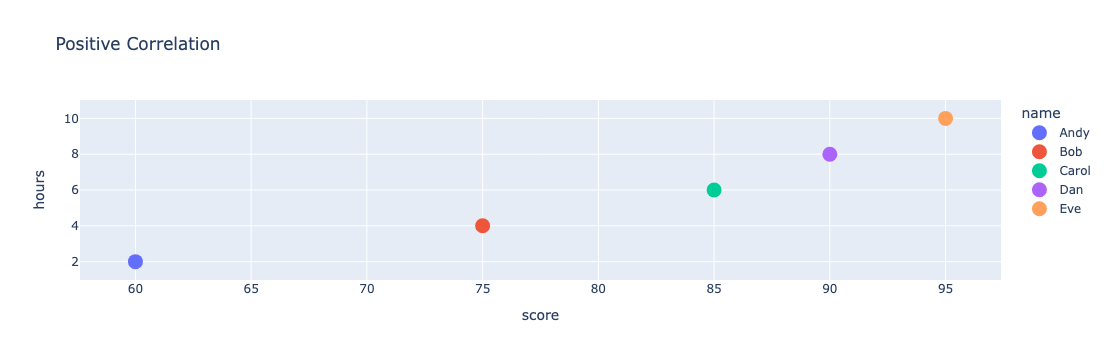

In [32]:
# Example of positive correlation
import pandas as pd
import io
import plotly.express as px

study_hours_exam_score ="""
name,hours,score
Andy,2,60
Bob,4,75
Carol,6,85
Dan,8,90
Eve,10,95
"""

# convert string to file like string buffer in memory
data = io.StringIO(study_hours_exam_score)
df_positive = pd.read_csv(data)

print('\nCorrelation between Study Hours and Exam Score:')
coefficient_of_correlation = df_positive['hours'].corr(df_positive['score'])
print(f'coefficient of correlation = {coefficient_of_correlation:.2f}')

fig = px.scatter(df_positive, x="score", y="hours", color="name", 
                 title="Positive Correlation")

fig.update_traces(marker=dict(size=15))
fig.show()



Correlation between Exercise Hours and Weight Change:
coefficient of correlation = -0.99


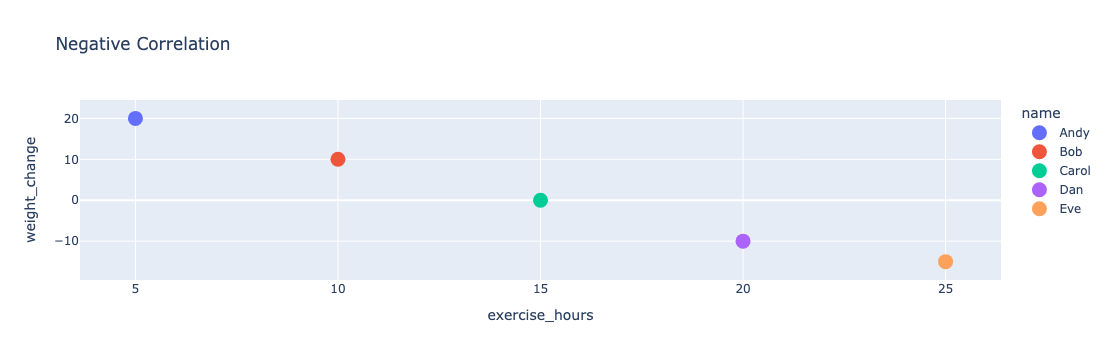

In [31]:
# Example of negative correlation
import pandas as pd
import io

exercise_hours_weight_change ="""
name,exercise_hours,weight_change
Andy,5,20
Bob,10,10
Carol,15,0
Dan,20,-10
Eve,25,-15
"""

# convert string to file like string buffer in memory
data = io.StringIO(exercise_hours_weight_change)
df_negative = pd.read_csv(data)

print('\nCorrelation between Exercise Hours and Weight Change:')
coefficient_of_correlation = df_negative['exercise_hours'].corr(df_negative['weight_change'])
print(f'coefficient of correlation = {coefficient_of_correlation:.2f}')

fig = px.scatter(df_negative, x="exercise_hours", y="weight_change", color="name", 
                 title="Negative Correlation")

fig.update_traces(marker=dict(size=15))
fig.show()